In [15]:
%matplotlib notebook
import os
import csv
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as sts
from scipy.stats import linregress

In [16]:
Unemploy_df=pd.read_csv("Resources/state_unemployment.csv")
pop_2019_df=pd.read_csv("Clean_Data_Output/Data.csv")
unemp_pop_df = pd.merge(Unemploy_df, pop_2019_df, on="State", how="left")
unemp_pop_df.dropna(how='any')
unemp_pop_df.head(50)

,State,unemployment_rate,Unnamed: 0,Median Income (2019),2019 Population,Population (2019),Total Murders (2019)
0,Alabama,2.7,0,"56,200","4,903,185",4903185.0,4.0
1,Alaska,6.0,1,"78,394","731,545",731545.0,69.0
2,Arizona,4.6,2,"70,674","7,278,717",7278717.0,337.0
3,Arkansas,3.6,3,"54,539","3,017,804",3017804.0,231.0
4,California,3.9,4,"78,105","39,512,223",39512223.0,1679.0
5,Colorado,2.5,5,"72,499","5,758,736",5758736.0,209.0
6,Connecticut,3.7,6,"87,291","3,565,287",3565287.0,104.0
7,Delaware,3.9,7,"74,194","973,764",973764.0,48.0
8,District of Columbia,5.3,8,"93,111","705,749",705749.0,166.0
9,Florida,3.0,9,"58,368","21,477,737",21477737.0,1.0


In [3]:
#bottom_five=Unemploy_df.sort_values("unemployment_rate").head(5)
#bottom_five

In [4]:
#U_rate=bottom_five["unemployment_rate"]
#x_axis=bottom_five["states"]
#plt.bar(x_axis, U_rate, color='b', alpha=0.70, align="center")
#plt.xticks(rotation = 90)
#plt.show()

In [5]:
#top_five=Unemploy_df.sort_values("unemployment_rate",ascending=False).head(5)
#top_five

In [6]:
#U_rate=top_five["unemployment_rate"]
#x_axis=top_five["states"]
#plt.bar(x_axis, U_rate, color='r', alpha=0.70, align="center")
#plt.xticks(rotation = 90)
#plt.show()

In [17]:
pop_2019_df.head()
del pop_2019_df["Unnamed: 0"]
del pop_2019_df["Population (2019)"]
pop_2019_df.head()




,State,Median Income (2019),2019 Population,Total Murders (2019)
0,Alabama,"56,200","4,903,185",4.0
1,Alaska,"78,394","731,545",69.0
2,Arizona,"70,674","7,278,717",337.0
3,Arkansas,"54,539","3,017,804",231.0
4,California,"78,105","39,512,223",1679.0


In [18]:
new_pop=pop_2019_df.sort_values(by="Median Income (2019)",ascending=True)
new_pop.dtypes
no_commas=new_pop["Median Income (2019)"].str.replace(",", "").astype(float)
no_commas.dtypes

dtype('float64')

<IPython.core.display.Javascript object>


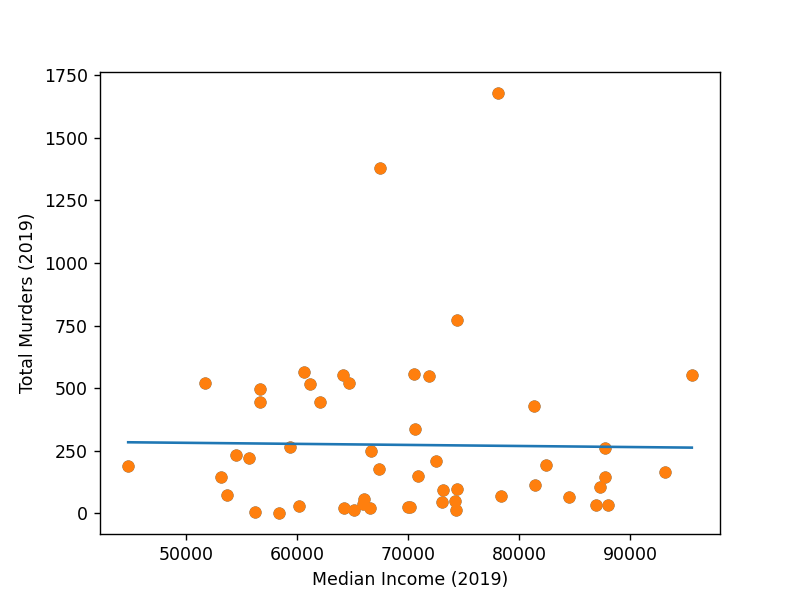

In [21]:
plt.scatter(no_commas,new_pop["Total Murders (2019)"])
plt.xlabel("Median Income (2019)",fontsize =10)
plt.ylabel("Total Murders (2019)",fontsize =10)
x_values=no_commas
y_values=new_pop["Total Murders (2019)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values)
plt.show()
plt.savefig("Image Output/MedianIncome_Regression.png")